## Importation du jeu de données sur les masques de visage

In [5]:
# Installer unrar
!apt-get install -y unrar

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [78]:
# Chemin vers le fichier rar dans Google Drive
rar_file_path = '/content/drive/MyDrive/data.rar'

In [8]:
import os
# Répertoire de destination pour l'extraction
output_dir = '/content/face-mask-dataset/'
# Extraire le fichier rar
!unrar x -y {rar_file_path} {output_dir}

# Vérifier si les fichiers ont été extraits correctement
extracted_files = os.listdir(output_dir)


Streaming output truncated to the last 5000 lines.
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_33.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_330.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3300.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3301.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3302.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3303.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3304.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3305.jpg      13%  OK 
Extracting  /content/face-mask-dataset/data/without_mask/without_mask_3306.jpg      13%  OK 
Extracting  /content/face-mask-dat

In [9]:
!ls

drive  face-mask-dataset  sample_data


In [12]:
with_mask_files = os.listdir('/content/face-mask-dataset/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_1622.jpg', 'with_mask_3028.jpg', 'with_mask_2923.jpg', 'with_mask_2423.jpg', 'with_mask_1699.jpg']
['with_mask_2890.jpg', 'with_mask_2327.jpg', 'with_mask_1493.jpg', 'with_mask_1040.jpg', 'with_mask_145.jpg']


In [13]:
without_mask_files = os.listdir('/content/face-mask-dataset/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1745.jpg', 'without_mask_3348.jpg', 'without_mask_420.jpg', 'without_mask_2817.jpg', 'without_mask_2177.jpg']
['without_mask_2626.jpg', 'without_mask_2919.jpg', 'without_mask_1046.jpg', 'without_mask_2635.jpg', 'without_mask_923.jpg']


In [88]:
print('Nombre d\'images avec masque :', len(with_mask_files))
print('Nombre d\'images sans masque :', len(without_mask_files))


Nombre d'images avec masque : 3725
Nombre d'images sans masque : 3828


## Création des Étiquettes pour les Deux Classes d'Images


with mask --> 1

without mask --> 0


In [16]:
# Création des Étiquettes

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


## Importation des dépendances

In [2]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

## Affichage des Images

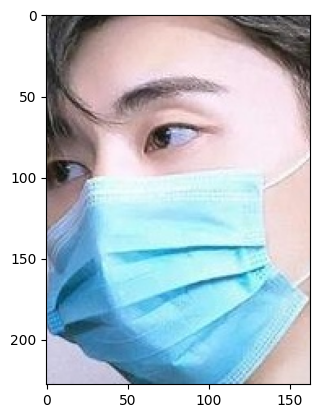

In [24]:
# afficher les images avec mask
img = mpimg.imread('/content/face-mask-dataset/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

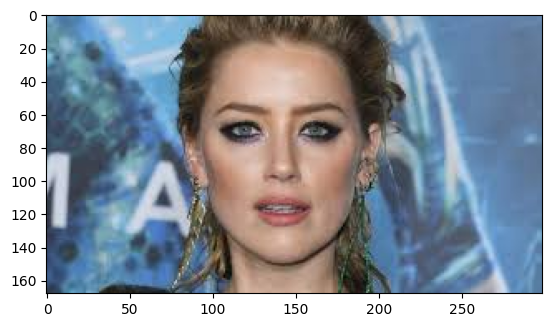

In [28]:
# affichage les images sans mask
img = mpimg.imread('/content/face-mask-dataset/data/without_mask/without_mask_2927.jpg')
imgplot = plt.imshow(img)
plt.show()

## Traitement d'Image

1. Redimensionner les images
2. Convertir l'image redimensionnée en tableau NumPy

In [36]:
# Redimensionner les images

with_mask_path = '/content/face-mask-dataset/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/face-mask-dataset/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



In [30]:
type(data)

list

In [31]:
len(data)

7553

array([[[ 52,  40,  28],
        [ 48,  36,  24],
        [ 42,  30,  18],
        ...,
        [ 48,  37,  29],
        [ 48,  38,  29],
        [ 48,  38,  28]],

       [[ 50,  38,  26],
        [ 49,  37,  25],
        [ 47,  34,  22],
        ...,
        [ 46,  35,  29],
        [ 47,  37,  28],
        [ 45,  35,  26]],

       [[ 44,  31,  19],
        [ 46,  33,  21],
        [ 49,  35,  24],
        ...,
        [ 47,  36,  30],
        [ 49,  38,  31],
        [ 43,  33,  25]],

       ...,

       [[102,  80,  60],
        [112,  90,  69],
        [119,  94,  74],
        ...,
        [160, 107,  57],
        [162, 109,  59],
        [163, 109,  62]],

       [[ 92,  71,  53],
        [104,  83,  64],
        [113,  90,  72],
        ...,
        [162, 109,  59],
        [161, 108,  58],
        [161, 107,  60]],

       [[ 82,  62,  47],
        [ 89,  69,  51],
        [ 93,  72,  55],
        ...,
        [166, 113,  63],
        [163, 110,  60],
        [160, 108,  60]]], dtype=uint8)
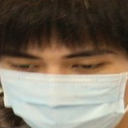

In [82]:
data[0]

In [34]:
type(data[0])

numpy.ndarray

In [35]:
data[0].shape

(128, 128, 3)

In [37]:
# Conversion de la liste d'images et de la liste d'étiquettes en tableaux numpy

X = np.array(data)
Y = np.array(labels)

In [38]:
type(X)

numpy.ndarray

In [84]:
type(Y)


numpy.ndarray

In [40]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [41]:
print(Y)

[1 1 1 ... 0 0 0]


## Train Test Split

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [43]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [44]:
# Mise à l'échelle des données

X_train_scaled = X_train/255

X_test_scaled = X_test/255

array([[[ 87, 178, 233],
        [ 65, 156, 211],
        [ 72, 160, 217],
        ...,
        [202, 189, 178],
        [217, 206, 197],
        [223, 213, 203]],

       [[ 81, 165, 225],
        [ 75, 161, 218],
        [ 79, 167, 222],
        ...,
        [200, 187, 178],
        [216, 205, 195],
        [221, 211, 201]],

       [[ 78, 157, 222],
        [ 88, 170, 231],
        [ 81, 168, 223],
        ...,
        [179, 166, 158],
        [210, 200, 190],
        [222, 212, 202]],

       ...,

       [[181, 230, 254],
        [174, 228, 252],
        [157, 217, 240],
        ...,
        [113,  94,  62],
        [102,  85,  55],
        [104,  87,  57]],

       [[190, 233, 254],
        [182, 231, 251],
        [165, 222, 238],
        ...,
        [105,  87,  56],
        [ 96,  78,  49],
        [101,  83,  54]],

       [[195, 234, 254],
        [186, 231, 247],
        [168, 220, 233],
        ...,
        [ 98,  81,  52],
        [ 99,  80,  52],
        [113,  93,  66]]], dtype=uint8)
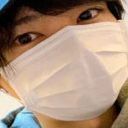

In [45]:
X_train[0]

In [46]:
X_train_scaled[0]

array([[[0.34117647, 0.69803922, 0.91372549],
        [0.25490196, 0.61176471, 0.82745098],
        [0.28235294, 0.62745098, 0.85098039],
        ...,
        [0.79215686, 0.74117647, 0.69803922],
        [0.85098039, 0.80784314, 0.77254902],
        [0.8745098 , 0.83529412, 0.79607843]],

       [[0.31764706, 0.64705882, 0.88235294],
        [0.29411765, 0.63137255, 0.85490196],
        [0.30980392, 0.65490196, 0.87058824],
        ...,
        [0.78431373, 0.73333333, 0.69803922],
        [0.84705882, 0.80392157, 0.76470588],
        [0.86666667, 0.82745098, 0.78823529]],

       [[0.30588235, 0.61568627, 0.87058824],
        [0.34509804, 0.66666667, 0.90588235],
        [0.31764706, 0.65882353, 0.8745098 ],
        ...,
        [0.70196078, 0.65098039, 0.61960784],
        [0.82352941, 0.78431373, 0.74509804],
        [0.87058824, 0.83137255, 0.79215686]],

       ...,

       [[0.70980392, 0.90196078, 0.99607843],
        [0.68235294, 0.89411765, 0.98823529],
        [0.61568627, 0

## Construction d'un Réseau de Neurones Convolutifs (CNN)

In [47]:
import tensorflow as tf
from tensorflow import keras

In [69]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [90]:
# compiler le réseau de neurones
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [73]:
# Entraîner le réseau de neurones
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 136s 785ms/step - acc: 0.6667 - loss: 0.7056 - val_acc: 0.8711 - val_loss: 0.3009
Epoch 2/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 139s 771ms/step - acc: 0.8846 - loss: 0.3033 - val_acc: 0.8893 - val_loss: 0.2885
Epoch 3/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 135s 793ms/step - acc: 0.9019 - loss: 0.2539 - val_acc: 0.9025 - val_loss: 0.3043
Epoch 4/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 142s 792ms/step - acc: 0.9062 - loss: 0.2481 - val_acc: 0.9174 - val_loss: 0.2803
Epoch 5/5
170/170 ━━━━━━━━━━━━━━━━━━━━ 144s 802ms/step - acc: 0.9284 - loss: 0.1795 - val_acc: 0.9107 - val_loss: 0.3134


## Évaluation du Modèle

In [76]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 223ms/step - acc: 0.9233 - loss: 0.2301
Test Accuracy = 0.9252150654792786


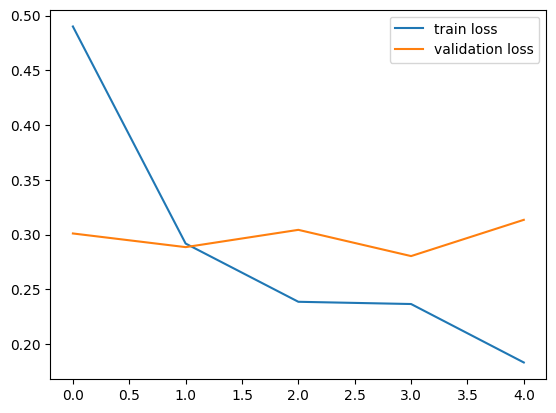

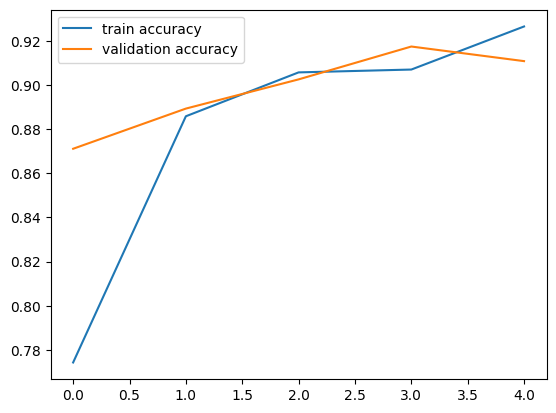

In [77]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()